In [23]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score

# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib import pyplot as plt
import seaborn as sn

# from sklearn.preprocessing import MinMaxScaler

In [47]:
dataset = pd.read_csv('data_snippet.csv')

dataset.head()

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year
1,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473
2,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402
3,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668
4,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334
5,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882


In [48]:
dataset_prices = dataset
for roi in ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year']:
    dataset_prices['price_'+roi[4:]] = dataset_prices['close']*(dataset_prices[roi]+1)
dataset_prices

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
1,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473,13.494996,12.155004,13.934995,18.684994
2,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402,8.937781,9.286663,10.213337,12.659997
3,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668,14.680006,13.704997,13.674998,17.349993
4,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334,8.148751,7.901246,9.106252,11.019999
5,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882,40.149996,40.860006,43.110003,57.469993
6,2021-04-07,RPM,Process Industries,0.657795,2021,4,7,90.209999,0.080479,0.007538,-0.115397,-0.042013,97.470010,90.890002,79.800036,86.420006
7,2021-04-07,AZO,Retail Trade,0.651998,2021,4,7,1423.270020,0.058970,0.088543,0.183001,0.514533,1507.200253,1549.290617,1683.729857,2155.589413
8,2021-04-07,QRVO,Electronic Technology,0.650983,2021,4,7,193.690002,-0.049099,-0.008725,-0.146420,-0.409830,184.180017,192.000057,165.329912,114.310028
9,2021-04-07,PHM,Consumer Durables,0.646593,2021,4,7,53.529999,0.153185,0.029516,-0.109658,-0.248085,61.729992,55.109990,47.660006,40.250009
10,2021-04-07,SCI,Consumer Services,0.636897,2021,4,7,51.610001,0.082348,0.062197,0.218175,0.345088,55.859981,54.819988,62.870013,69.419993


<AxesSubplot:>

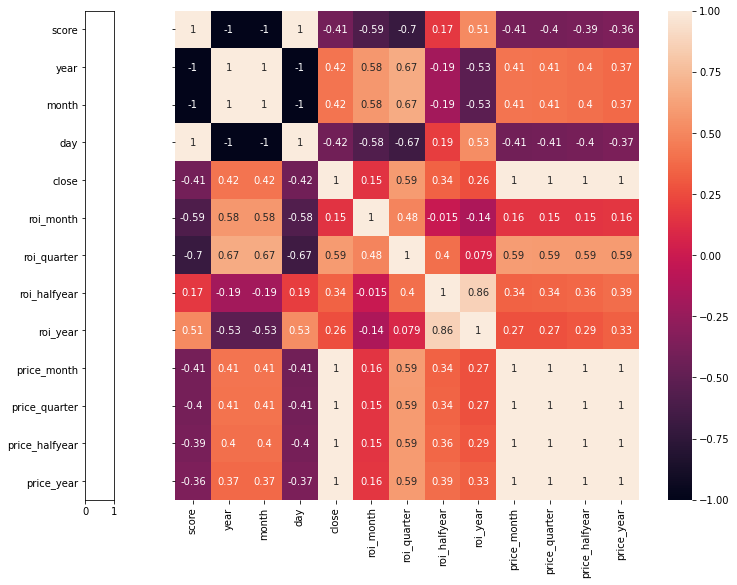

In [49]:
fig, ax = plt.subplots(1,2, figsize=(12, 9), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
sn.heatmap(dataset_prices.corr(), annot=True)

In [50]:
feature_cols = ["date", "symbol", "econ_branch", "score", "year", "month", "day", "close"]

In [51]:
dataset_prices["day_sin"] = np.sin(2*np.pi*dataset_prices["day"]/31)
dataset_prices["day_cos"] = np.cos(2*np.pi*dataset_prices["day"]/31)
dataset_prices["month_sin"] = np.sin(2*np.pi*dataset_prices["month"]/12)
dataset_prices["month_cos"] = np.cos(2*np.pi*dataset_prices["month"]/12)
dataset_prices

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year,day_sin,day_cos,month_sin,month_cos
1,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473,13.494996,12.155004,13.934995,18.684994,0.790776,-0.612106,0.866025,0.5
2,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402,8.937781,9.286663,10.213337,12.659997,0.790776,-0.612106,0.866025,0.5
3,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668,14.680006,13.704997,13.674998,17.349993,0.790776,-0.612106,0.866025,0.5
4,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334,8.148751,7.901246,9.106252,11.019999,0.790776,-0.612106,0.866025,0.5
5,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882,40.149996,40.860006,43.110003,57.469993,0.790776,-0.612106,0.866025,0.5
6,2021-04-07,RPM,Process Industries,0.657795,2021,4,7,90.209999,0.080479,0.007538,-0.115397,-0.042013,97.470010,90.890002,79.800036,86.420006,0.988468,0.151428,0.866025,-0.5
7,2021-04-07,AZO,Retail Trade,0.651998,2021,4,7,1423.270020,0.058970,0.088543,0.183001,0.514533,1507.200253,1549.290617,1683.729857,2155.589413,0.988468,0.151428,0.866025,-0.5
8,2021-04-07,QRVO,Electronic Technology,0.650983,2021,4,7,193.690002,-0.049099,-0.008725,-0.146420,-0.409830,184.180017,192.000057,165.329912,114.310028,0.988468,0.151428,0.866025,-0.5
9,2021-04-07,PHM,Consumer Durables,0.646593,2021,4,7,53.529999,0.153185,0.029516,-0.109658,-0.248085,61.729992,55.109990,47.660006,40.250009,0.988468,0.151428,0.866025,-0.5
10,2021-04-07,SCI,Consumer Services,0.636897,2021,4,7,51.610001,0.082348,0.062197,0.218175,0.345088,55.859981,54.819988,62.870013,69.419993,0.988468,0.151428,0.866025,-0.5


In [52]:
transformations = {"square": lambda x: x**2,
                    "cube": lambda x: x**3, 
                    "log": lambda x: np.log(x), 
                    "reciprocal": lambda x: 1/x,
                    "sqrt": lambda x: np.sqrt(x),
                    "sin": lambda x: np.sin(x),
                    "cos": lambda x: np.cos(x)
                    }

In [53]:
numeric_feature_cols = ["score", "year", "month", "day", "close"]

In [70]:
correlations = []
for feature_col in numeric_feature_cols:
    for transform_name, transformation in transformations.items():
        for transform_name2, transformation2 in transformations.items():
            looked_at_transform = np.array(transformation2(transformation(dataset_prices[feature_col].astype(float))))
            operation_name = f"{transform_name2}({transform_name}({feature_col}))"
            corr_value = np.corrcoef(dataset_prices["roi_year"].astype(float), looked_at_transform)[0][1]
            if not np.isnan(corr_value):
                correlations.append((operation_name, corr_value))
                # print((operation_name, corr_value))
correlations.sort(reverse=True, key=lambda x: abs(x[1]))
correlations

[('sin(log(close))', 0.6597130666295962),
 ('cube(sin(close))', 0.575494057915221),
 ('sin(sin(close))', 0.5714500185922861),
 ('sin(sqrt(close))', -0.5394188941039333),
 ('square(cos(month))', -0.5259335781492128),
 ('cos(cos(month))', 0.5259335781492128),
 ('sqrt(log(day))', 0.5259335781492128),
 ('sqrt(sqrt(day))', 0.5259335781492128),
 ('reciprocal(square(year))', 0.5259335781492127),
 ('cos(square(year))', -0.5259335781492127),
 ('reciprocal(cube(year))', 0.5259335781492127),
 ('cube(log(year))', -0.5259335781492127),
 ('log(log(year))', -0.5259335781492127),
 ('reciprocal(log(year))', 0.5259335781492127),
 ('sqrt(log(year))', -0.5259335781492127),
 ('cos(log(year))', 0.5259335781492127),
 ('sin(reciprocal(year))', 0.5259335781492127),
 ('sqrt(sqrt(year))', -0.5259335781492127),
 ('cos(sqrt(year))', 0.5259335781492127),
 ('square(sin(year))', -0.5259335781492127),
 ('sin(sin(year))', 0.5259335781492127),
 ('cos(sin(year))', 0.5259335781492127),
 ('square(cos(year))', 0.52593357814